In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [60]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [73]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Hour of Day,Day of Week,Weekend Indicator,Usage Ratio
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000,997.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,977.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620,0.480441,2016-04-10 10:33:36.840000,0.50000,11.660000,3.064000,0.28500,0.372971
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000,0.000000,2016-01-01 02:52:00,0.00000,0.000000,0.000000,0.00000,0.167043
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000,0.000000,2016-02-18 02:55:15,0.00000,6.000000,1.000000,0.00000,0.307689
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000,0.000000,2016-04-07 17:27:00,0.50000,12.000000,3.000000,0.00000,0.359822
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000,1.000000,2016-05-31 03:18:00,1.00000,18.000000,5.000000,1.00000,0.430760
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000,1.000000,2016-07-24 00:22:00,1.00000,23.000000,6.000000,1.00000,0.668106
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142,0.499868,NaN,0.50025,6.960952,1.998474,0.45164,0.098779


Numerical Data Summary:

1. Kolom Daily Time Spent on Site memiliki nilai rata-rata 64.93 menit, dengan standar deviasi sekitar 15.84 menit, menunjukkan bahwa sebagian besar user menghabiskan antara 32.6 hingga 91.43 menit di situs tersebut.
2. Kolom Age rata-rata berada di 36 tahun, dengan rentang usia antara 19 hingga 61 tahun.
3. Area Income menunjukkan nilai pendapatan rata-rata sekitar 384 juta, dengan variasi besar, dari 97 juta hingga 556 juta.
4. Kolom Daily Internet Usage memiliki rata-rata penggunaan internet harian sebesar 179.86 menit, dengan kisaran antara 104.78 hingga 267.01 menit.

Categorical Data Summary:

1. Kolom Gender (Male): Distribusi gender hampir seimbang, dengan 518 perempuan dan 479 laki-laki.
2. Kolom Clicked on Ad: Terdapat distribusi yang seimbang antara yang mengklik iklan (Yes: 500) dan yang tidak (No: 500).
3. Top 10 Cities: Kota terbanyak berasal dari Surabaya dan Bandung, masing-masing dengan 64 observasi, diikuti Jakarta Timur (63) dan Jakarta Selatan (61).
4. Top 10 Provinces: DKI Jakarta memiliki jumlah observasi terbanyak (253), disusul oleh Jawa Barat (210) dan Jawa Timur (90).
5. Top 10 Categories: Kategori iklan didominasi oleh otomotif, rumah, kesehatan, fashion, dan makanan.

In [62]:
# Descriptive statistics for numerical columns
numerical_stats = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].describe()

# Frequency counts for categorical columns
categorical_stats = {
    'Male': df['Male'].value_counts(),
    'Clicked on Ad': df['Clicked on Ad'].value_counts(),
    'city': df['city'].value_counts().head(10),  # showing top 10 cities
    'province': df['province'].value_counts().head(10),  # showing top 10 provinces
    'category': df['category'].value_counts().head(10)   # showing top 10 categories
}

# Display results
numerical_stats, categorical_stats

(       Daily Time Spent on Site          Age   Area Income  \
 count                987.000000  1000.000000  9.870000e+02   
 mean                  64.929524    36.009000  3.848647e+08   
 std                   15.844699     8.785562  9.407999e+07   
 min                   32.600000    19.000000  9.797550e+07   
 25%                   51.270000    29.000000  3.286330e+08   
 50%                   68.110000    35.000000  3.990683e+08   
 75%                   78.460000    42.000000  4.583554e+08   
 max                   91.430000    61.000000  5.563936e+08   
 
        Daily Internet Usage  
 count            989.000000  
 mean             179.863620  
 std               43.870142  
 min              104.780000  
 25%              138.710000  
 50%              182.650000  
 75%              218.790000  
 max              267.010000  ,
 {'Male': Male
  Perempuan    518
  Laki-Laki    479
  Name: count, dtype: int64,
  'Clicked on Ad': Clicked on Ad
  No     500
  Yes    500
  Name: co

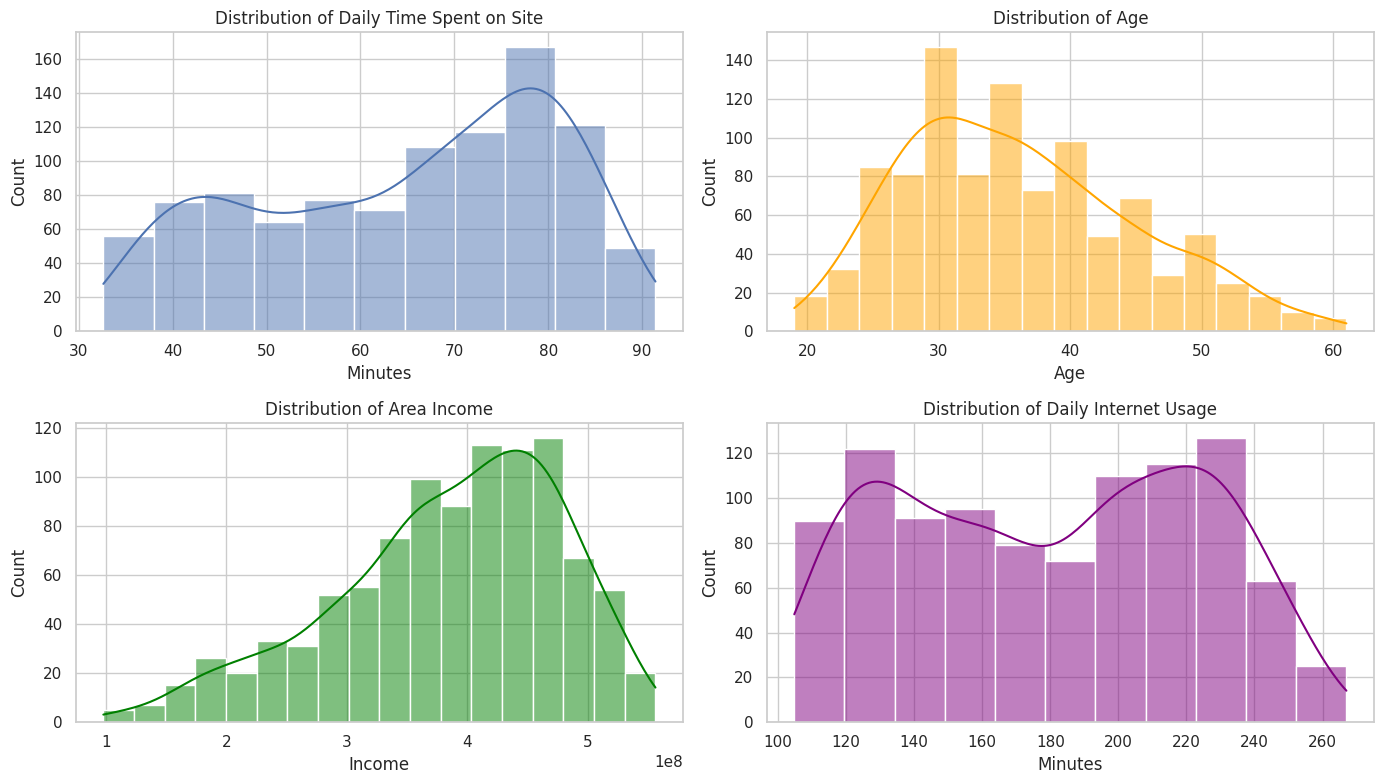

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of numerical features
plt.figure(figsize=(14, 8))

# Daily Time Spent on Site
plt.subplot(2, 2, 1)
sns.histplot(df['Daily Time Spent on Site'].dropna(), kde=True)
plt.title("Distribution of Daily Time Spent on Site")
plt.xlabel("Minutes")

# Age
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True, color='orange')
plt.title("Distribution of Age")
plt.xlabel("Age")

# Area Income
plt.subplot(2, 2, 3)
sns.histplot(df['Area Income'].dropna(), kde=True, color='green')
plt.title("Distribution of Area Income")
plt.xlabel("Income")

# Daily Internet Usage
plt.subplot(2, 2, 4)
sns.histplot(df['Daily Internet Usage'].dropna(), kde=True, color='purple')
plt.title("Distribution of Daily Internet Usage")
plt.xlabel("Minutes")

plt.tight_layout()
plt.show()


1. Daily Time Spent on Site: Distribusi waktu harian yang dihabiskan di situs menunjukkan puncak di sekitar 60-80 menit.
2. Age: Distribusi usia menunjukkan konsentrasi yang cukup merata dengan puncak di usia 30-40 tahun.
3. Area Income: Pendapatan area memiliki distribusi dengan puncak sekitar 300-400 juta, menunjukkan variasi besar dalam rentang pendapatan.
4. Daily Internet Usage: Penggunaan internet harian memiliki distribusi bimodal dengan puncak di sekitar 140 dan 200 menit, menandakan pola penggunaan yang mungkin terkait dengan kategori atau lokasi.

In [64]:
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Feature: Hour of Day
df['Hour of Day'] = df['Timestamp'].dt.hour

# Feature: Day of Week
df['Day of Week'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Feature: Weekend Indicator
df['Weekend Indicator'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

# Feature: Age Group
def age_group(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['Age Group'] = df['Age'].apply(age_group)

# Feature: Usage Ratio (Daily Time Spent on Site / Daily Internet Usage)
df['Usage Ratio'] = df['Daily Time Spent on Site'] / df['Daily Internet Usage']

# Feature: Income Bracket
def income_bracket(income):
    if income < 2e8:
        return 'Low'
    elif 2e8 <= income < 4e8:
        return 'Medium'
    else:
        return 'High'

df['Income Bracket'] = df['Area Income'].apply(income_bracket)

# Display the first few rows to check the new features
df[['Hour of Day', 'Day of Week', 'Weekend Indicator', 'Age Group', 'Usage Ratio', 'Income Bracket']].head()


,Hour of Day,Day of Week,Weekend Indicator,Age Group,Usage Ratio,Income Bracket
0,0,6,1,Adult,0.269241,High
1,1,0,0,Adult,0.414048,High
2,20,6,1,Young Adult,0.293742,High
3,2,6,1,Young Adult,0.301558,Medium
4,3,4,0,Adult,0.303085,High


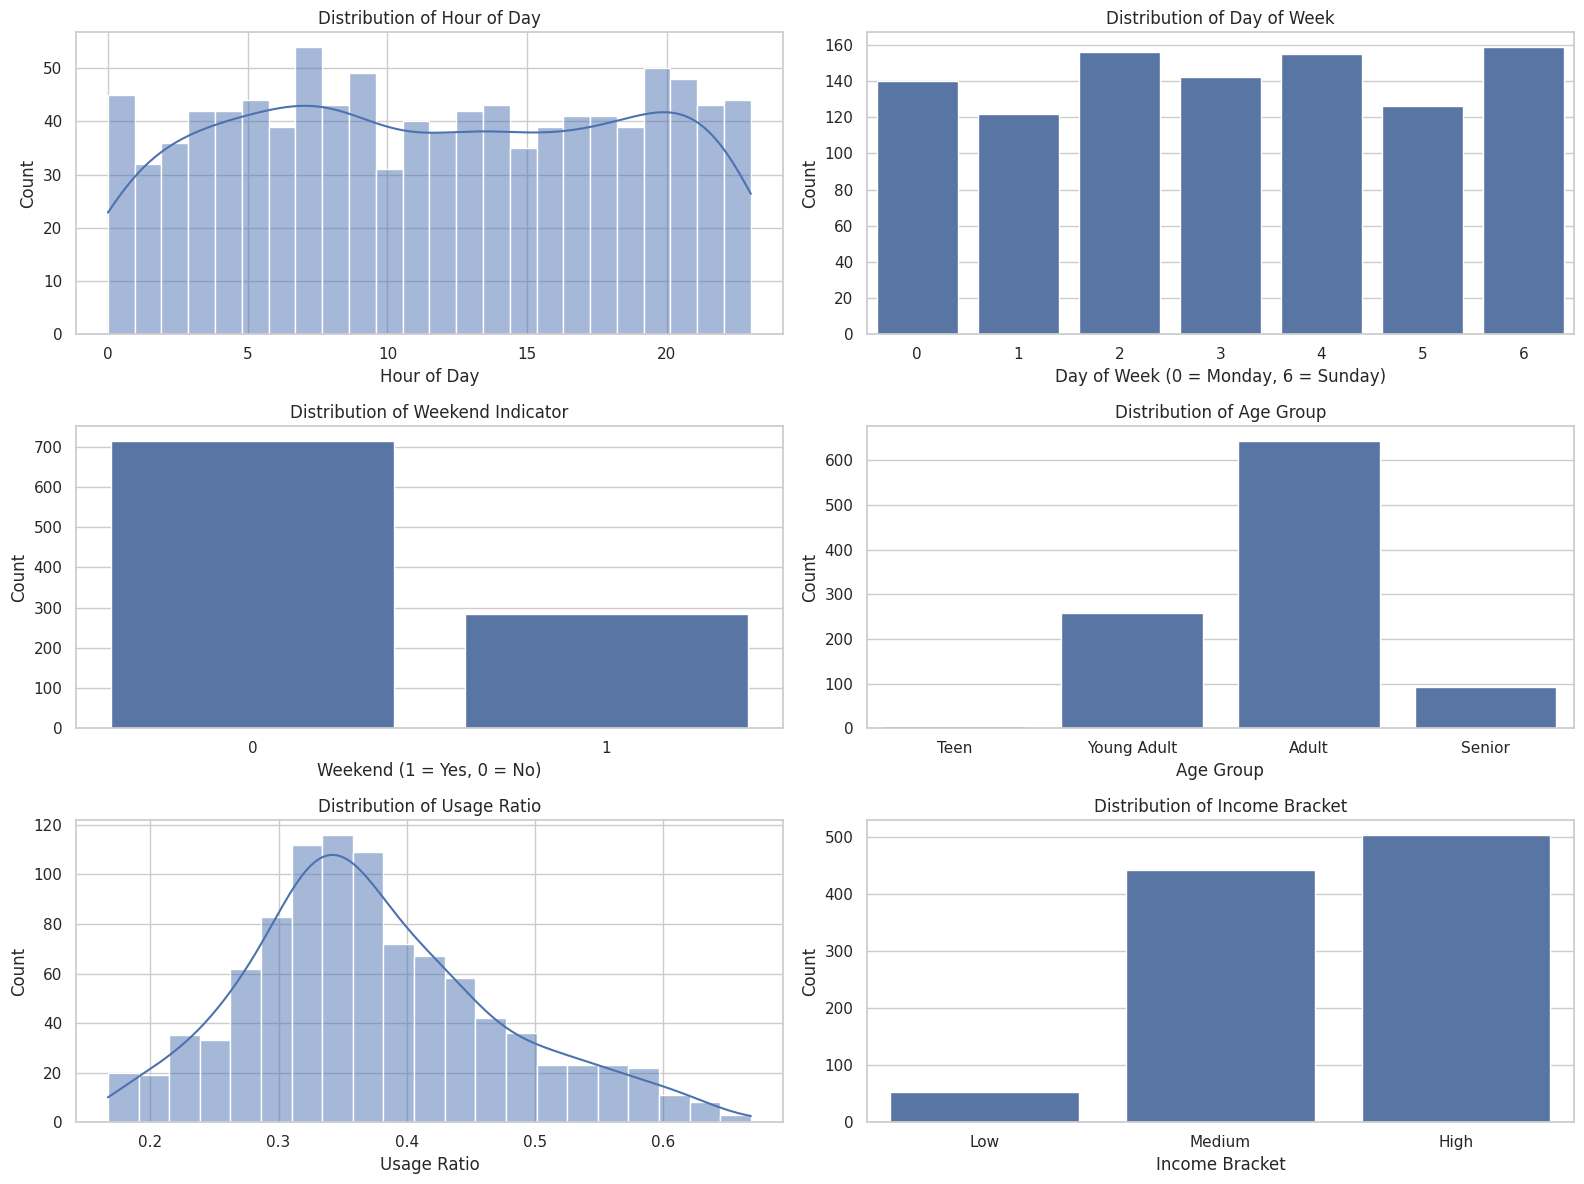

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for all plots
sns.set(style="whitegrid")

# Univariate analysis for new features: Hour of Day, Day of Week, Weekend Indicator, Age Group, Usage Ratio, and Income Bracket
plt.figure(figsize=(16, 12))

# Hour of Day
plt.subplot(3, 2, 1)
sns.histplot(df['Hour of Day'].dropna(), kde=True, bins=24)
plt.title("Distribution of Hour of Day")
plt.xlabel("Hour of Day")

# Day of Week
plt.subplot(3, 2, 2)
sns.countplot(x='Day of Week', data=df)
plt.title("Distribution of Day of Week")
plt.xlabel("Day of Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Count")

# Weekend Indicator
plt.subplot(3, 2, 3)
sns.countplot(x='Weekend Indicator', data=df)
plt.title("Distribution of Weekend Indicator")
plt.xlabel("Weekend (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Age Group
plt.subplot(3, 2, 4)
sns.countplot(x='Age Group', data=df, order=['Teen', 'Young Adult', 'Adult', 'Senior'])
plt.title("Distribution of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Usage Ratio
plt.subplot(3, 2, 5)
sns.histplot(df['Usage Ratio'].dropna(), kde=True)
plt.title("Distribution of Usage Ratio")
plt.xlabel("Usage Ratio")

# Income Bracket
plt.subplot(3, 2, 6)
sns.countplot(x='Income Bracket', data=df, order=['Low', 'Medium', 'High'])
plt.title("Distribution of Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Male                      997 non-null    object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Hour of Day               1000 non-null   int32         
 12  Day of Week          

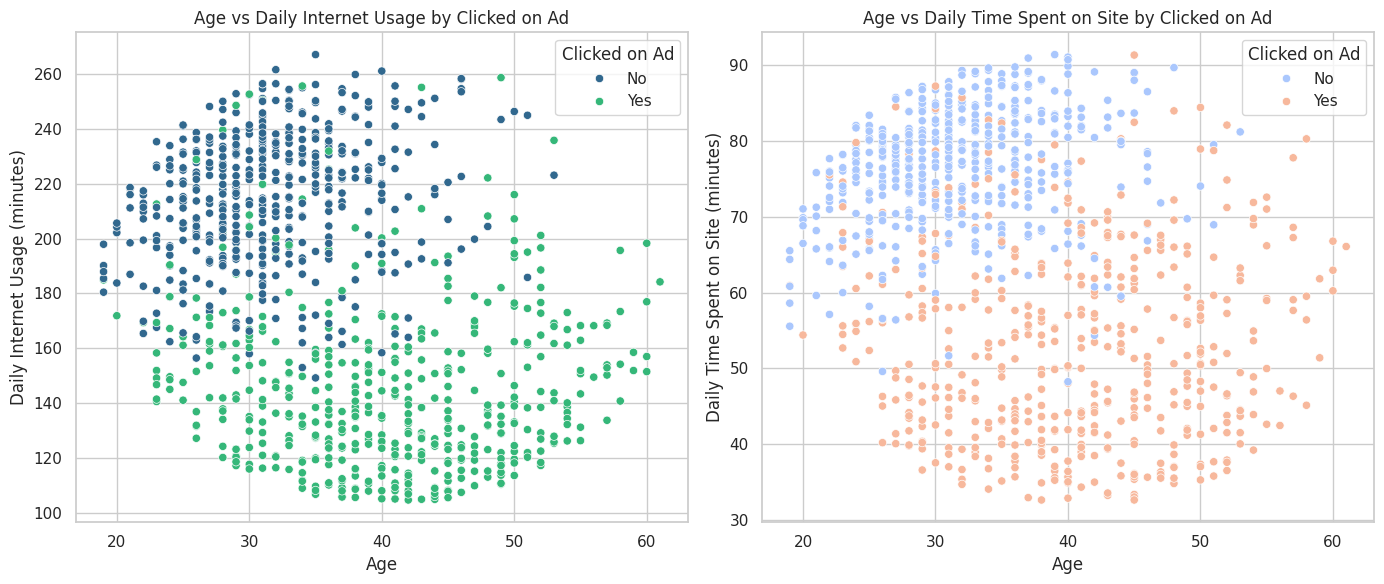

In [67]:
# Bivariate Analysis: Relationship between Age, Daily Internet Usage, and Daily Time Spent on Site

plt.figure(figsize=(14, 6))

# Scatter plot of Age vs Daily Internet Usage colored by Clicked on Ad
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', palette='viridis')
plt.title("Age vs Daily Internet Usage by Clicked on Ad")
plt.xlabel("Age")
plt.ylabel("Daily Internet Usage (minutes)")

# Scatter plot of Age vs Daily Time Spent on Site colored by Clicked on Ad
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', palette='coolwarm')
plt.title("Age vs Daily Time Spent on Site by Clicked on Ad")
plt.xlabel("Age")
plt.ylabel("Daily Time Spent on Site (minutes)")

plt.tight_layout()
plt.show()


1. Age vs Daily Internet Usage: Terdapat penyebaran cukup merata di seluruh rentang usia, dengan beberapa kluster pengguna internet yang lebih aktif pada usia 30-50 tahun. Namun, pengguna yang mengklik iklan cenderung memiliki penggunaan internet dibawah 180 menit per hari.

2. Age vs Daily Time Spent on Site: Pengguna dengan rentang usia menengah cenderung menghabiskan lebih banyak waktu di situs. Hal ini menunjukkan bahwa usia mempengaruhi keterlibatan di situs dan mungkin keterkaitan dengan kecenderungan klik iklan. Pengguna yang mengklik iklan cenderung memiliki penggunaan internet dibawah 60 menit per hari.

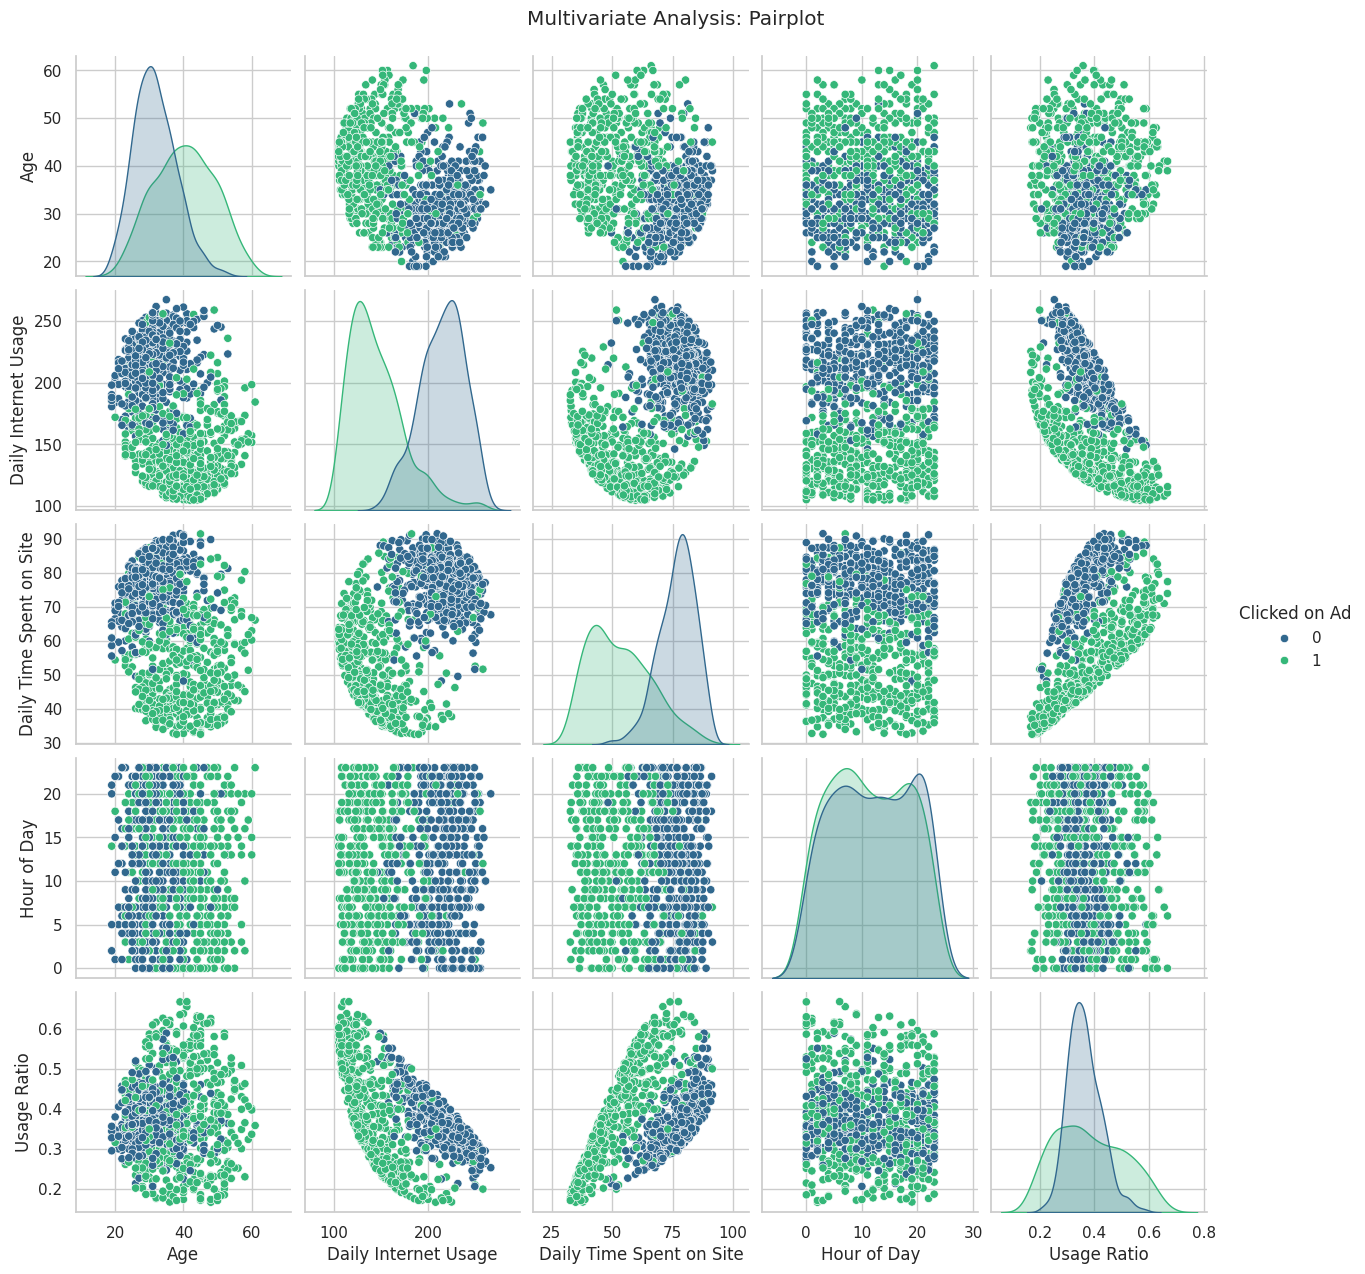

In [74]:
# Multivariate Analysis: Pairplot for Age, Daily Internet Usage, Daily Time Spent on Site, and Clicked on Ad
sns.pairplot(df[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Clicked on Ad', 'Hour of Day', 'Usage Ratio']].dropna(),
             hue='Clicked on Ad', palette='viridis')
plt.suptitle("Multivariate Analysis: Pairplot", y=1.02)
plt.show()


1. Kelompok usia menengah cenderung lebih banyak mengklik iklan dibandingkan dengan usia yang lebih muda atau lebih tua.
2. Pengguna dengan waktu internet harian yang lebih rendah dan waktu di situs yang lebih singkat lebih cenderung mengklik iklan.
3. Hari dalam minggu dan jam dalam hari tampaknya tidak memberikan pengaruh signifikan terhadap klik iklan.
4. Usage Ratio menunjukkan bahwa pengguna yang lebih terfokus pada situs cenderung tidak mengklik iklan.

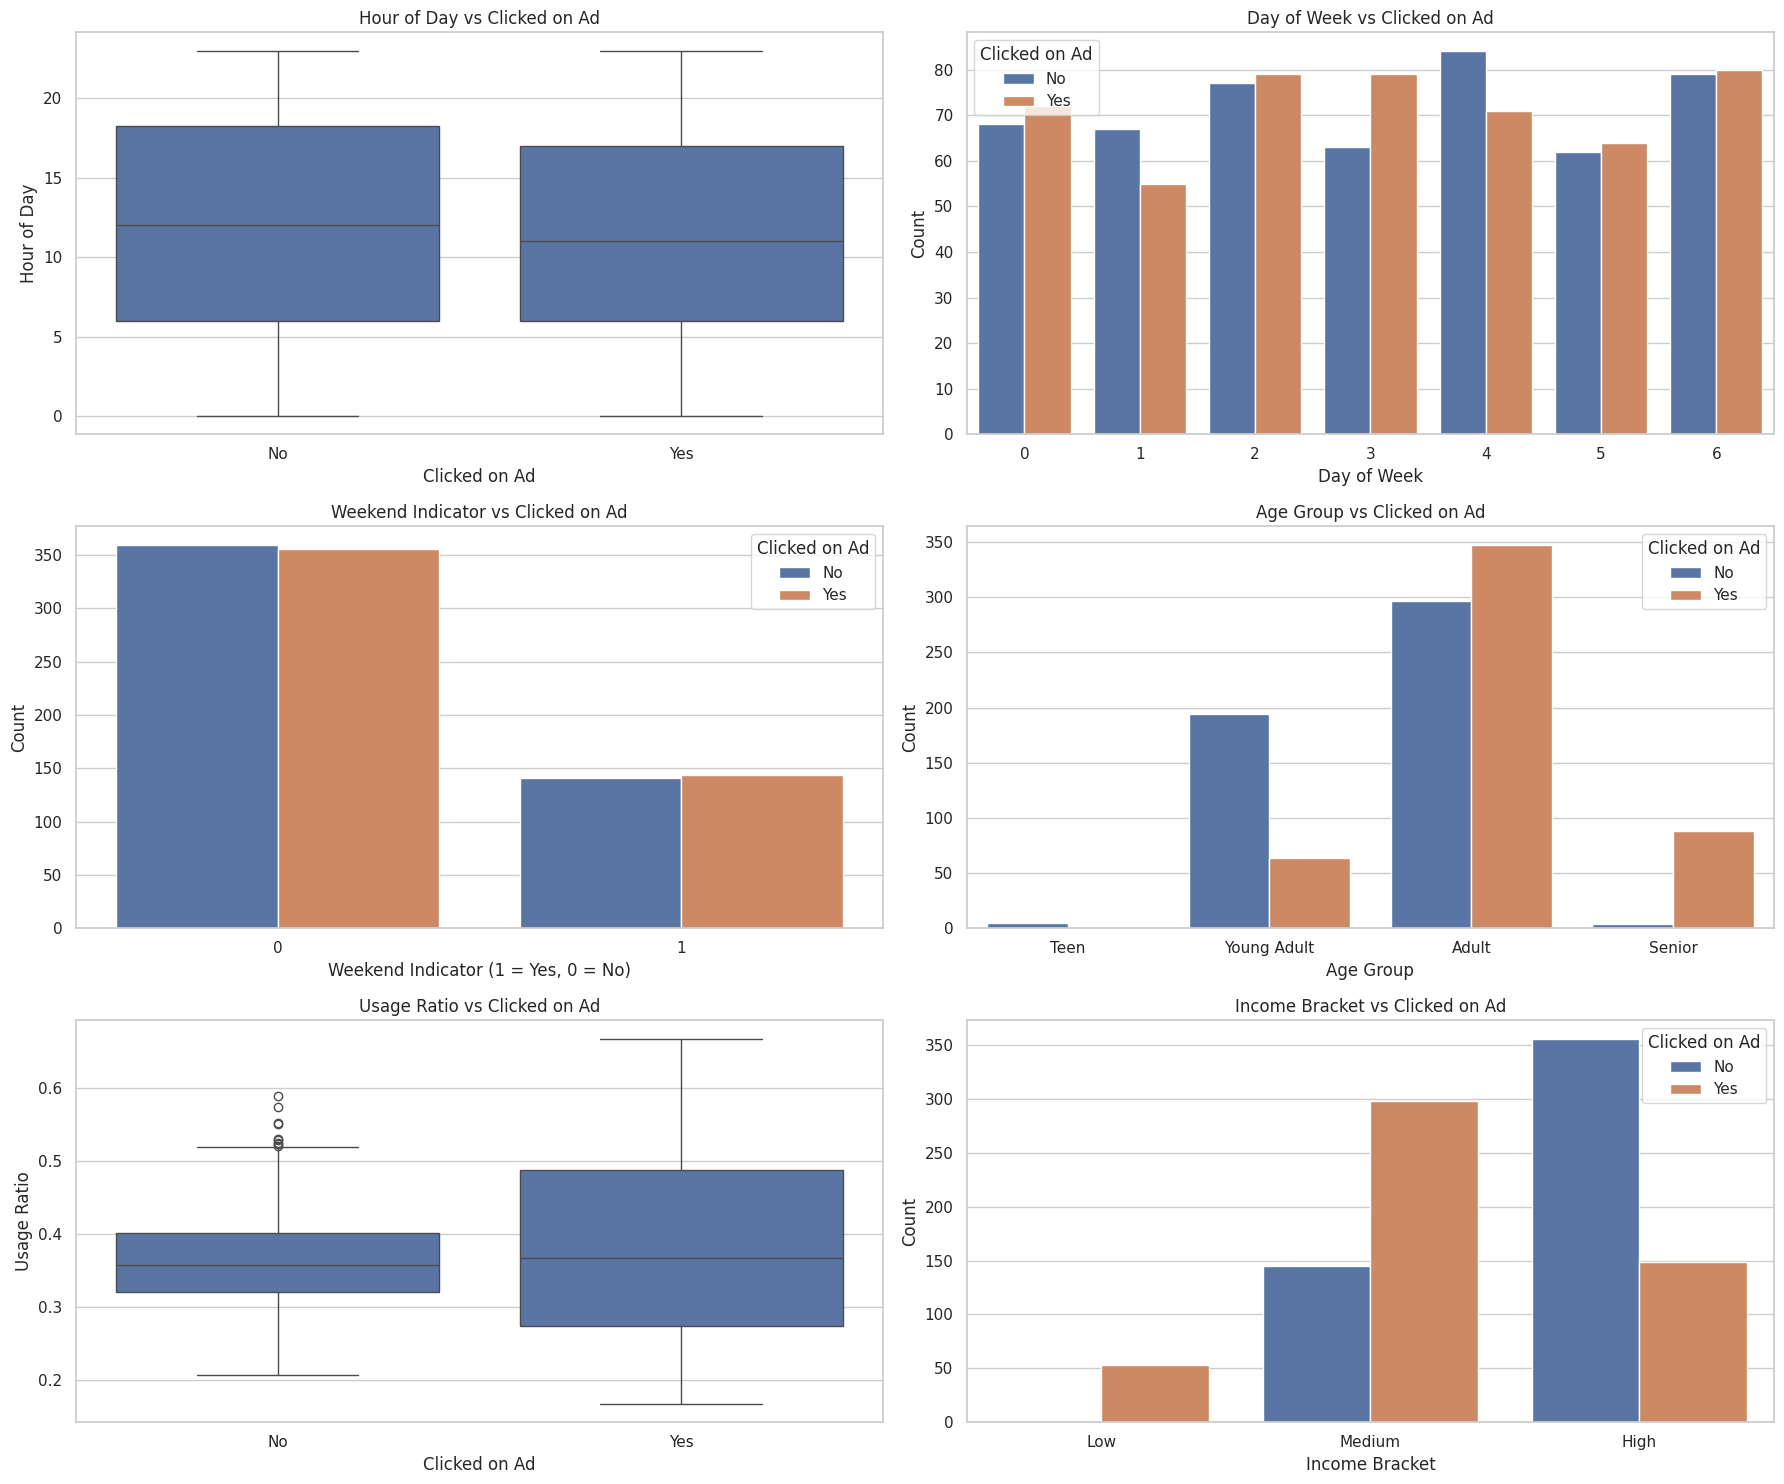

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure size and style
plt.figure(figsize=(18, 15))
sns.set(style="whitegrid")

# 1. Hour of Day vs Clicked on Ad
plt.subplot(3, 2, 1)
sns.boxplot(x='Clicked on Ad', y='Hour of Day', data=df)
plt.title("Hour of Day vs Clicked on Ad")
plt.xlabel("Clicked on Ad")
plt.ylabel("Hour of Day")

# 2. Day of Week vs Clicked on Ad
plt.subplot(3, 2, 2)
sns.countplot(x='Day of Week', hue='Clicked on Ad', data=df)
plt.title("Day of Week vs Clicked on Ad")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# 3. Weekend Indicator vs Clicked on Ad
plt.subplot(3, 2, 3)
sns.countplot(x='Weekend Indicator', hue='Clicked on Ad', data=df)
plt.title("Weekend Indicator vs Clicked on Ad")
plt.xlabel("Weekend Indicator (1 = Yes, 0 = No)")
plt.ylabel("Count")

# 4. Age Group vs Clicked on Ad
plt.subplot(3, 2, 4)
sns.countplot(x='Age Group', hue='Clicked on Ad', data=df, order=['Teen', 'Young Adult', 'Adult', 'Senior'])
plt.title("Age Group vs Clicked on Ad")
plt.xlabel("Age Group")
plt.ylabel("Count")

# 5. Usage Ratio vs Clicked on Ad
plt.subplot(3, 2, 5)
sns.boxplot(x='Clicked on Ad', y='Usage Ratio', data=df)
plt.title("Usage Ratio vs Clicked on Ad")
plt.xlabel("Clicked on Ad")
plt.ylabel("Usage Ratio")

# 6. Income Bracket vs Clicked on Ad
plt.subplot(3, 2, 6)
sns.countplot(x='Income Bracket', hue='Clicked on Ad', data=df, order=['Low', 'Medium', 'High'])
plt.title("Income Bracket vs Clicked on Ad")
plt.xlabel("Income Bracket")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Insight:

1. Usia dan Pendapatan adalah dua faktor yang memiliki pengaruh signifikan pada klik iklan. Kelompok usia dewasa dan pengguna dengan pendapatan menengah adalah yang paling responsif terhadap iklan.
2. Hari dalam minggu dan jam dalam sehari tidak menunjukkan pengaruh yang jelas terhadap klik iklan, menunjukkan bahwa efektivitas iklan cenderung stabil sepanjang minggu.
3. Pengguna dengan rasio penggunaan lebih rendah lebih cenderung untuk mengklik iklan, mungkin karena mereka menggunakan situs ini sebagai bagian kecil dari aktivitas internet mereka.

In [70]:
# Encoder untuk kolom 'Male' dan 'Clicked on Ad'

# Mengonversi kolom 'Male': 'Perempuan' -> 0, 'Laki-Laki' -> 1
df['Male'] = df['Male'].map({'Perempuan': 0, 'Laki-Laki': 1})

# Mengonversi kolom 'Clicked on Ad': 'No' -> 0, 'Yes' -> 1
df['Clicked on Ad'] = df['Clicked on Ad'].map({'No': 0, 'Yes': 1})


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Male                      997 non-null    float64       
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int64         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Hour of Day               1000 non-null   int32         
 12  Day of Week          

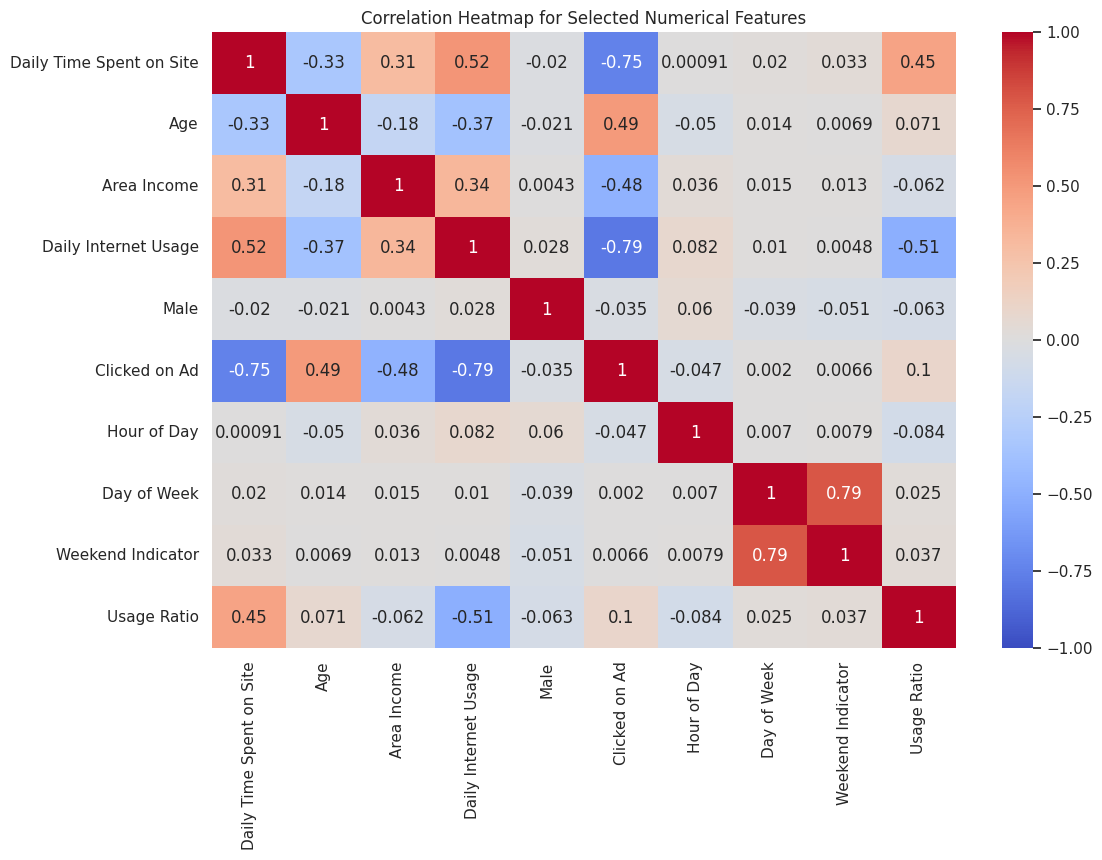

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih subset data dengan kolom-kolom numerik yang akan digunakan untuk korelasi
selected_features = [
    'Daily Time Spent on Site',
    'Age',
    'Area Income',
    'Daily Internet Usage',
    'Male',
    'Clicked on Ad',
    'Hour of Day',
    'Day of Week',
    'Weekend Indicator',
    'Usage Ratio'
]

# Menghitung korelasi antar fitur yang dipilih
correlation_matrix = df[selected_features].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Numerical Features")
plt.show()


Korelasi Positif dan Negatif dengan Klik Iklan (Clicked on Ad)
1. Clicked on Ad vs Daily Time Spent on Site: Korelasi negatif yang kuat (-0.75). Ini menunjukkan bahwa semakin lama waktu yang dihabiskan pengguna di situs, semakin kecil kemungkinannya untuk mengklik iklan. Pengguna yang lebih terfokus di situs cenderung kurang responsif terhadap iklan.
2. Clicked on Ad vs Age: Korelasi positif yang moderat (0.49). Ini menunjukkan bahwa pengguna yang lebih tua lebih cenderung mengklik iklan dibandingkan dengan pengguna yang lebih muda.
3. Clicked on Ad vs Area Income: Korelasi negatif (-0.48). Pengguna dari area dengan pendapatan yang lebih tinggi cenderung lebih sedikit mengklik iklan dibandingkan dengan pengguna dari area dengan pendapatan lebih rendah.
4. Clicked on Ad vs Daily Internet Usage: Korelasi negatif yang signifikan (-0.79). Ini menunjukkan bahwa pengguna dengan penggunaan internet harian yang lebih tinggi lebih sedikit mengklik iklan, mungkin karena kebiasaan mereka mengabaikan iklan.

Korelasi Lain yang Menarik
1. Daily Time Spent on Site vs Daily Internet Usage: Korelasi positif yang cukup kuat (0.52). Ini menunjukkan bahwa pengguna yang menghabiskan lebih banyak waktu di internet secara umum juga menghabiskan lebih banyak waktu di situs ini.
2. Usage Ratio vs Daily Time Spent on Site: Korelasi positif (0.45). Pengguna dengan rasio penggunaan lebih tinggi juga cenderung menghabiskan lebih banyak waktu di situs ini.
3. Weekend Indicator vs Day of Week: Korelasi sangat kuat (0.79). Ini karena variabel Weekend Indicator menunjukkan akhir pekan atau hari kerja, yang secara langsung berhubungan dengan Day of Week.

Korelasi yang Rendah atau Tidak Signifikan
1. Male: Korelasi sangat rendah dengan variabel lainnya, yang menunjukkan bahwa jenis kelamin tidak memiliki hubungan kuat dengan variabel lain seperti waktu di situs atau kecenderungan mengklik iklan.
2. Hour of Day, Day of Week, dan Weekend Indicator: Variabel waktu (jam, hari dalam minggu, dan indikator akhir pekan) menunjukkan korelasi yang sangat rendah dengan Clicked on Ad, menunjukkan bahwa waktu dalam hari atau hari dalam minggu tidak berpengaruh signifikan terhadap klik iklan dalam dataset ini.

Insight:

1. Karakteristik Demografis seperti usia dan pendapatan area memiliki hubungan signifikan dengan klik iklan, di mana pengguna yang lebih tua dan berasal dari area dengan pendapatan lebih rendah lebih cenderung mengklik iklan.
2. Perilaku Penggunaan Internet berhubungan dengan klik iklan. Pengguna yang menghabiskan lebih banyak waktu di internet atau di situs cenderung kurang tertarik untuk mengklik iklan.
3. Faktor Waktu seperti hari dalam minggu atau jam tidak memiliki pengaruh signifikan terhadap klik iklan, yang berarti iklan berpotensi dilihat secara merata tanpa perbedaan waktu yang mencolok.